For the first question, I want to find out how the coding life span affects the ex-coder's opinion regarding coding.

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Here is a list of the different answers provided
rel_col = ["YearsCodedJobPast", "ExCoderReturn", 
                 "ExCoderNotForMe", "ExCoderBalance", "ExCoder10Years",
                 "ExCoderBelonged", "ExCoderSkills", "ExCoderWillNotCode",
                 "ExCoderActive"]

df_rel = df[rel_col]

In [10]:
# drop the NaN values
df_rel = df_rel.dropna()
df_rel

,YearsCodedJobPast,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive
12,17 to 18 years,Agree,Strongly disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Disagree,Somewhat agree
46,5 to 6 years,Agree,Disagree,Agree,Somewhat agree,Strongly disagree,Somewhat agree,Somewhat agree,Agree
197,19 to 20 years,Somewhat agree,Strongly disagree,Agree,Agree,Strongly disagree,Disagree,Somewhat agree,Disagree
266,7 to 8 years,Disagree,Strongly agree,Agree,Strongly disagree,Disagree,Disagree,Somewhat agree,Agree
309,4 to 5 years,Disagree,Somewhat agree,Disagree,Strongly disagree,Strongly agree,Disagree,Agree,Somewhat agree
...,...,...,...,...,...,...,...,...,...
51006,5 to 6 years,Strongly agree,Strongly disagree,Somewhat agree,Disagree,Somewhat agree,Agree,Disagree,Agree
51062,20 or more years,Disagree,Strongly disagree,Disagree,Somewhat agree,Somewhat agree,Agree,Agree,Strongly agree
51102,10 to 11 years,Strongly agree,Strongly disagree,Disagree,Disagree,Strongly disagree,Somewhat agree,Disagree,Somewhat agree
51273,1 to 2 years,Disagree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Strongly agree,Disagree,Disagree


In [11]:
df_rel.YearsCodedJobPast.value_counts()

20 or more years    140
2 to 3 years         66
1 to 2 years         63
4 to 5 years         58
3 to 4 years         54
9 to 10 years        52
10 to 11 years       48
7 to 8 years         43
Less than a year     43
5 to 6 years         40
14 to 15 years       37
15 to 16 years       34
6 to 7 years         26
11 to 12 years       26
8 to 9 years         20
19 to 20 years       20
17 to 18 years       19
12 to 13 years       18
13 to 14 years       17
16 to 17 years       17
18 to 19 years        3
Name: YearsCodedJobPast, dtype: int64

In [30]:
# seems the categories of YearsCodedJobPast are too many, narrow down the ranges
# Also switch the answers to integers: Strongly disagree = 0, Disagree = 1, Somewhat agree = 2, Agree = 3, 
# Strongly agree = 4
di = {"Strongly disagree":0, "Disagree":1, "Somewhat agree":2, "Agree":3, "Strongly agree":4}
df_rel = df_rel.replace(di)

# coded less than 5 years
rows_5 = ['Less than a year', '1 to 2 years', '2 to 3 years', '3 to 4 years', '4 to 5 years']
df_5 = df_rel[df_rel.YearsCodedJobPast.isin(rows_5)]

# coded 5-10 years
rows_10 = ['5 to 6 years', '6 to 7 years', '7 to 8 years', '8 to 9 years', '9 to 10 years']
df_10 = df_rel[df_rel.YearsCodedJobPast.isin(rows_10)]

# coded 10-15 years
rows_15 = ['10 to 11 years', '11 to 12 years', '12 to 13 years', '13 to 14 years', '14 to 15 years']
df_15 = df_rel[df_rel.YearsCodedJobPast.isin(rows_15)]

# coded 15-20 years
rows_20 = ['15 to 16 years', '16 to 17 years', '17 to 18 years', '18 to 19 years', '19 to 20 years']
df_20 = df_rel[df_rel.YearsCodedJobPast.isin(rows_20)]

# coded 20 plus years
df_20_plus = df_rel[df_rel['YearsCodedJobPast'] == '20 or more years']


In [71]:
df_temp = pd.DataFrame(df_5.mean()).T
df_temp.rename(index={0: '0-5 years'}, inplace=True)
df_temp = df_temp.append(pd.DataFrame(df_10.mean()).T.rename(index={0: '5-10 years'}))
df_temp = df_temp.append(pd.DataFrame(df_15.mean()).T.rename(index={0: '10-15 years'}))
df_temp = df_temp.append(pd.DataFrame(df_20.mean()).T.rename(index={0: '15-20 years'}))
df_temp = df_temp.append(pd.DataFrame(df_20_plus.mean()).T.rename(index={0: '20 plus years'}))

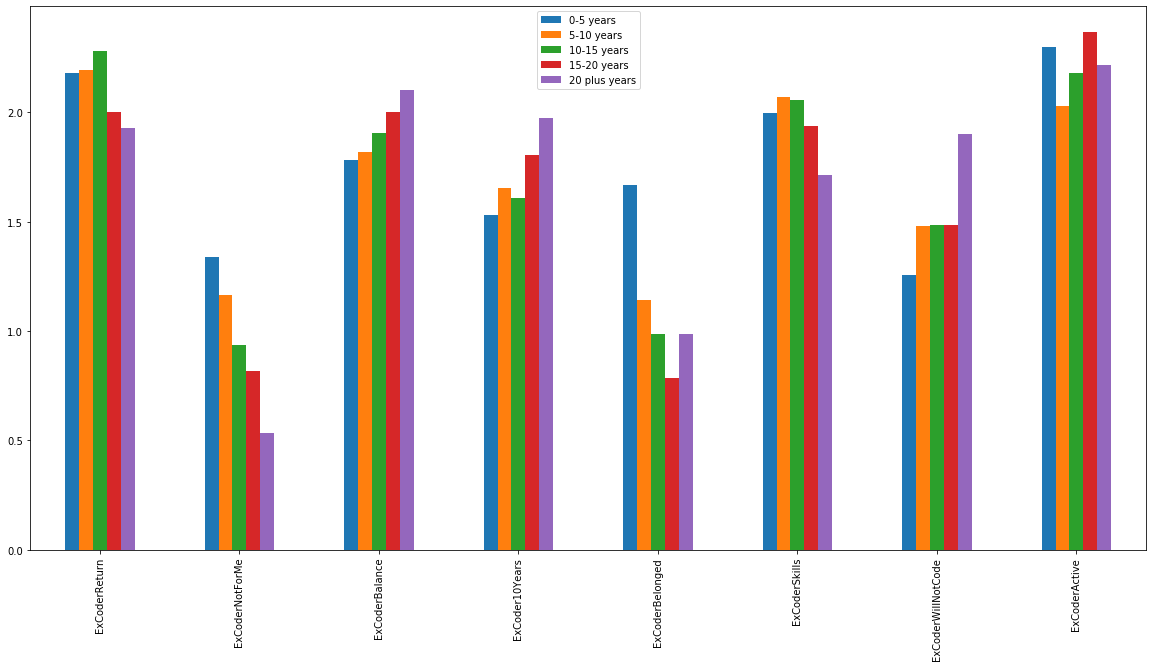

In [72]:
df_temp.T.plot.bar(figsize=(20,10))